<a href="https://colab.research.google.com/github/Geon03/Lyric-Generator-using-RNN/blob/main/Lyric_Generator_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [ ]:
!pip install pandas numpy seaborn matplotlib nltk keras Pillow wordcloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

**Load Data**

In [ ]:
data = pd.read_csv("/content/Songs.csv")
data.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


**Data Exploration**

In [ ]:
print("Artists in the data:\n",data.Artist.value_counts())

Artists in the data:
 Artist
Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: count, dtype: int64


In [ ]:
print("Size of Dataset:",data.shape)

Size of Dataset: (745, 3)


In [ ]:
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


<Figure size 1500x1500 with 0 Axes>

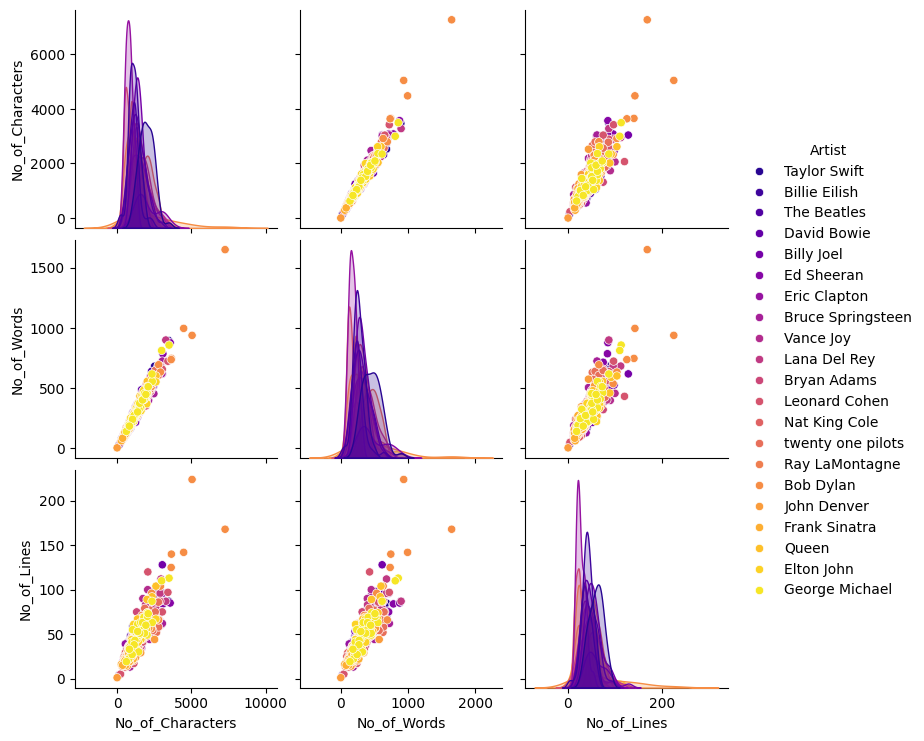

In [ ]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")

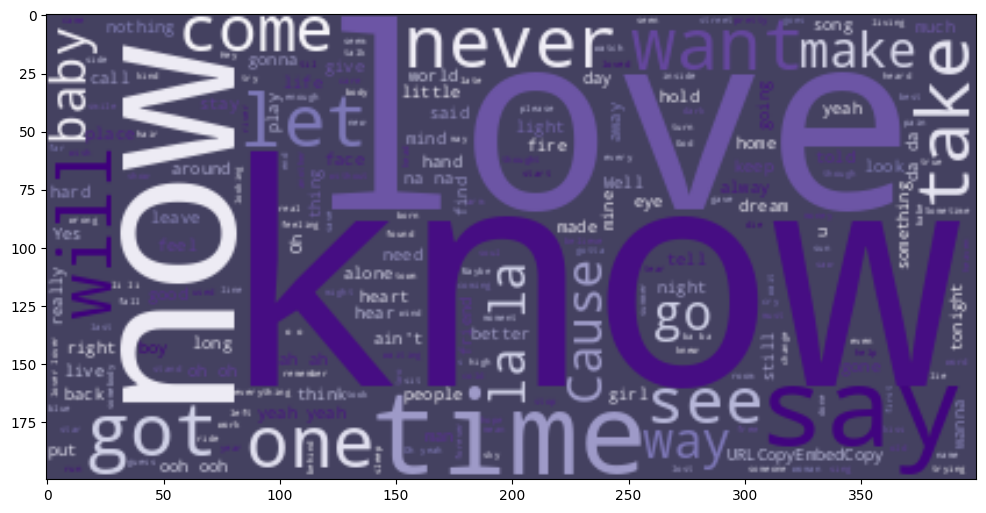

In [ ]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

**Data Preprocessing**

In [ ]:
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem

Corpus = Corpus.lower() #converting all alphabets to lowecase
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


In [ ]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [ ]:
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”',
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

In [ ]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [ ]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


In [ ]:
#Import the module
from tensorflow.keras.utils import to_categorical

# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = to_categorical(targets)

**Model Building**

In [ ]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 47)                  │          12,079 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,271 (1.05 MB)

 Trainable params: 276,271 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 66s 7ms/step - loss: 2.7261
Epoch 2/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - loss: 2.2900
Epoch 3/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 2.0974
Epoch 4/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - loss: 1.9803
Epoch 5/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - loss: 1.9054
Epoch 6/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 1.8395
Epoch 7/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - loss: 1.8129
Epoch 8/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 1.7619
Epoch 9/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 1.7537
Epoch 10/10
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - loss: 1.7200


**Evaluating Model**

[Text(0.5, 0, 'Epochs')]

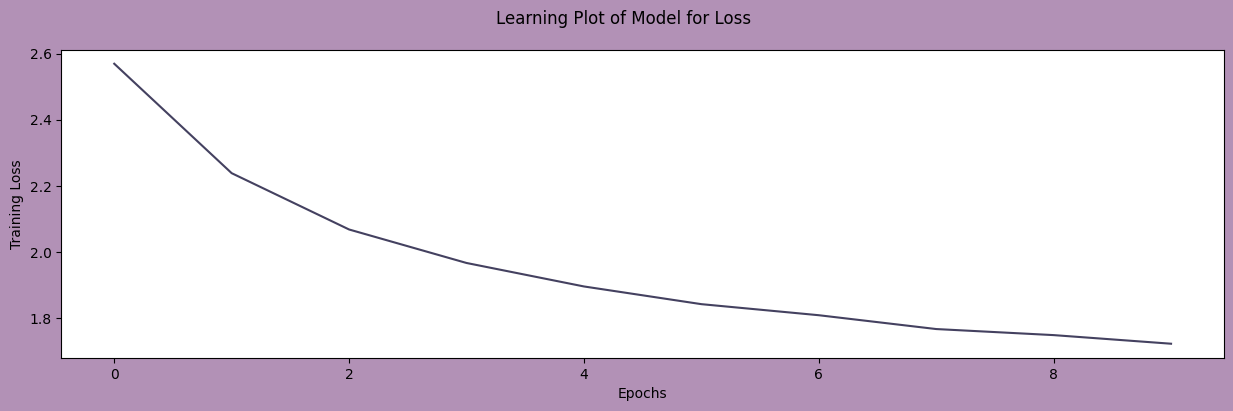

In [ ]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

Generating the songs

In [ ]:
# The function to generate text from model
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter
    seed=[mapping[char] for char in starter]
    generated += starter
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char

    return generated

In [ ]:
#Generating a song from the model
song_1 = Lyrics_Generator("the shoe shrunk, and the school belt got ridiculously petit", 400)
#Let's have a look at the song
My_song(song_1)

the shoe shrunk, and the school belt got ridiculously petite
when i mever gedr the world
i was born to the world io the might
ie it was sha ooe i want to get the siaee
i mever leer mn toeer the sioe
i was seereng the siae io the might
ie i could tee the world io the might
ie it was sha ooe i want to get the siaee
i mever leer mn toeer the sioe
i was seereng the siae io the might
ie i could tee the world io the might
ie it was sha ooe i want to get the sia


In [ ]:
#Generating a song from the model using a song out of the corpus
song_2 = Lyrics_Generator("i'm a sunflower, a little funny", 400)
#Let's have a look at the song
My_song(song_2)

i'm a sunflower, a little funny of the world
i was born to the world io my eart
and i want to riee my bacy
i mnve the mind of the world
i was born to the world io my eart
and i want to riee my bacy
i mnve the mind of the world
i was born to the world io my eart
and i want to riee my bacy
i mnve the mind of the world
i was born to the world io my eart
and i want to riee my bacy
i mnve the mind of the world
i was born to the worl
